In [17]:
##########
#name of subreddit, change this
subName = "wallstreetbets"
#########################################








import pandas

##################################Cleaning Posts/Submissions file###############################
postsDF = pandas.read_csv("Sub-wallstreetbets-010121-080121-CreatedOn-230321-154649.csv")

postsDF.columns = ['author', 'id', 'created_utc', 'title', 'selftext', 'score']
print("Shape of Posts:", postsDF.shape)

####################Cleaning#######################

#make copy before cleaning
cleanedPostsDF = postsDF.copy()

#Removed deleted selftext of post meaning that the author or moderator deleted their post.
cleanedPostsDF = cleanedPostsDF.drop(cleanedPostsDF[cleanedPostsDF.selftext == '[removed]'].index)
cleanedPostsDF = cleanedPostsDF.drop(cleanedPostsDF[cleanedPostsDF.author == '[deleted]'].index)
print("After Removed:", cleanedPostsDF.shape)
###################################################

#print head
cleanedPostsDF.head()

Shape of Posts: (1991, 6)
After Removed: (1015, 6)


,author,id,created_utc,title,selftext,score
0,Conundrum5,ko18qm,1609459993,"So, /r/stocks, what was your 2020 investment r...",Also give a rough sense for the size of your p...,1
1,ok-jello-6286,ko1c6o,1609460337,Stocks for beginners: How do you know which st...,I noticed that Apple has the Stocks app. Just ...,1
3,McLarenLT,ko1n6v,1609461465,Built two Google Sheets templates with automat...,"Hey all, a few days ago, I posted a spreadshee...",1
6,thegeorgetalk,ko1zjr,1609462771,ARK invest selling $TSLA,Ark invest ETF’s ARKW and ARKK have sold Sizea...,1
7,Western-Memory-1403,ko23a2,1609463138,"Recent IPO, Chindata (CD). Looks promising. Wh...",https://www.chindatagroup.com/\n\nChindata IPO...,1


In [18]:
############################################Comments and cleaning comments###########################

cmmntsDF = pandas.read_csv("Comments-wallstreetbets-010121-270221-CreatedOn-240321-225631.csv")
cmmntsDF.columns = ['author', 'id', 'created_utc', 'is_submitter', 'body', 'link_id', 'parent_id', 'score', 'total_awards_received', 'banned_at_utc']
print("Shape of Comments:", cmmntsDF.shape)

cleanedCmmntsDF = cmmntsDF.copy()

####################Cleaning#######################

#Removed deleted body of comment meaning that the author or moderator deleted their post.
cleanedCmmntsDF = cleanedCmmntsDF.drop(cleanedCmmntsDF[cleanedCmmntsDF.body == '[removed]'].index)

#Remove comments where the comment is made by the author of the post. i.e remove self edges.
cleanedCmmntsDF = cleanedCmmntsDF.loc[cleanedCmmntsDF['is_submitter'] == False]
###################################################


print("Shape after clean:", cleanedCmmntsDF.shape)
cleanedCmmntsDF.head()

Shape of Comments: (349858, 10)
Shape after clean: (325712, 10)


,author,id,created_utc,is_submitter,body,link_id,parent_id,score,total_awards_received,banned_at_utc
0,coolcomfort123,ghnmu9n,1609459282,False,"msft, amzn, and googl.",t3_knz1y8,t3_knz1y8,1,0,NaN
1,williewgu,ghnmwvl,1609459325,False,Option 3: $NET $ARKK $SE $CRWD,t3_ko0zlv,t3_ko0zlv,1,0,NaN
2,spike142,ghnn147,1609459395,False,"NIO Day, checking in",t3_knz1y8,t1_ghnfa0m,1,0,NaN
3,williewgu,ghnn1dj,1609459400,False,You could be a market researcher? Plenty of jo...,t3_knzusk,t3_knzusk,1,0,NaN
4,viburnum608,ghnn1hw,1609459402,False,FATMAN,t3_knyw3j,t3_knyw3j,1,0,NaN


In [19]:
################################################Pruning nodes################################################

#Comment Pruning
#Remove those that made only one comment
authorsFreq = cleanedCmmntsDF.copy()
authorsFreq = authorsFreq['author'].value_counts() > 1


#Convert back to dataframe
filteredAuth = authorsFreq.to_frame()
filteredAuth.reset_index(inplace=True)

#Set Column names 
filteredAuth.columns = ['author', 'tokeep']


#Get list of authors to keep
filteredAuth = filteredAuth[filteredAuth['tokeep'] == True]
listofAuth = filteredAuth['author'].tolist()

#Filter
filteredCom = cleanedCmmntsDF[cleanedCmmntsDF['author'].isin(listofAuth)]



####################Clean posts################################################

#############Random sample the posts######################
# cleanedPostsDF = cleanedPostsDF.sample(n = 100)
##########################################################

#All posts in feb
# cleanedPostsDF = cleanedPostsDF[cleanedPostsDF['created_utc'] > 1612137600]

#First Week in Jan, 1st Jan to 8th Jan 00:00 and score more than 1
print(cleanedPostsDF.shape)
cleanedPostsDF = cleanedPostsDF[(cleanedPostsDF['created_utc'] > 1609459200) & (cleanedPostsDF['created_utc'] < 1610064000)]
cleanedPostsDF = cleanedPostsDF[(cleanedPostsDF['score'] > 1)]
print(cleanedPostsDF.shape)



print("Before filter shape:",cleanedCmmntsDF.shape)
print("Filtered comments shape:",filteredCom.shape)
filteredCom.head()

(1015, 6)
(77, 6)
Before filter shape: (325712, 10)
Filtered comments shape: (285288, 10)


,author,id,created_utc,is_submitter,body,link_id,parent_id,score,total_awards_received,banned_at_utc
0,coolcomfort123,ghnmu9n,1609459282,False,"msft, amzn, and googl.",t3_knz1y8,t3_knz1y8,1,0,NaN
1,williewgu,ghnmwvl,1609459325,False,Option 3: $NET $ARKK $SE $CRWD,t3_ko0zlv,t3_ko0zlv,1,0,NaN
2,spike142,ghnn147,1609459395,False,"NIO Day, checking in",t3_knz1y8,t1_ghnfa0m,1,0,NaN
3,williewgu,ghnn1dj,1609459400,False,You could be a market researcher? Plenty of jo...,t3_knzusk,t3_knzusk,1,0,NaN
4,viburnum608,ghnn1hw,1609459402,False,FATMAN,t3_knyw3j,t3_knyw3j,1,0,NaN


In [20]:
#Merge and get comments to posts

#Clean before merge
#Note the link_id in the comments csv from the data download starts with 't3_'
#We need to remove the first 3 chars to remove this so that we can link comments 
#with posts with a merge join.
cleanFilteredCom = filteredCom.copy()
cleanFilteredCom['link_id'] = cleanFilteredCom['link_id'].str[3:]


#Merge Join
merged = pandas.merge(cleanedPostsDF, cleanFilteredCom, left_on='id', right_on='link_id')
print("Shape of Merge:", merged.shape)

merged.head()


##Saving Files
from pathlib import Path
Path("Cleaned Posts and Comments Data/With AutoMod/Cleaned Posts").mkdir(parents=True, exist_ok=True)
Path("Cleaned Posts and Comments Data/With AutoMod/Cleaned Comments").mkdir(parents=True, exist_ok=True)

#Get Posts Data only of the cleaned posts, from the 1,000s of posts
postsDataDF = merged[['author_x', 'id_x', 'created_utc_x', 'title', 'selftext','score_x']]
postsDataDF.columns = ['author', 'id', 'created_utc', 'title', 'selftext', 'score']
postsDataDF = postsDataDF.drop_duplicates()
postsDataDF.to_csv("Cleaned Posts and Comments Data/With AutoMod/Cleaned Posts/cleanedPostsData-WITHAutoMod-{}.csv".format(subName), index=False)



#Get Comments Data only of the cleaned posts, from the 1,000,000 comments which has all the comments
commentsOfPostsDF = merged[['author_y', 'id_y', 'created_utc_y', 'is_submitter', 'body', 'link_id','parent_id', 'score_y', 'total_awards_received', 'banned_at_utc']]
commentsOfPostsDF.columns = ['author', 'id', 'created_utc', 'is_submitter', 'body', 'link_id', 'parent_id', 'score', 'total_awards_received', 'banned_at_utc']
commentsOfPostsDF.to_csv("Cleaned Posts and Comments Data/With AutoMod/Cleaned Comments/cleanedCommentsofPostsData-WITHAutoMod-{}.csv".format(subName), index=False)

Shape of Merge: (2979, 16)


In [21]:
from pathlib import Path
Path("Edgelists/With Automod").mkdir(parents=True, exist_ok=True)

############Edge List from merged###################

edgeList = merged.copy()
edgeList = edgeList[["author_y", "author_x"]]
edgeList.columns = ["Source", "Target"]

#Drop duplicates but add a edge weight columns
#Maybe switch to edge weight?
print("With duplicate edges:", edgeList.shape)
# edgeList.drop_duplicates(subset=["Source", "Target"], keep='first',inplace=True)
#Weight Column
edgeList = edgeList.groupby(['Source', 'Target']).size().sort_values(ascending=False).reset_index(name='Weight')
print("Without duplicate edges and with edge weight column:", edgeList.shape)


edgeList.to_csv("Edgelists/With Automod/{}-EdgeList-WithAutoMod-CommentsToPosts.csv".format(subName), index=False)
edgeList.head()

With duplicate edges: (2979, 2)
Without duplicate edges and with edge weight column: (1954, 3)


,Source,Target,Weight
0,dnavi97,hoverboardfaq,22
1,El_Narco_Polo,hoverboardfaq,20
2,The_Folkhero,drtywlf,14
3,kevinwiinns,AmusedSeagull,13
4,mred209,AmusedSeagull,13


In [22]:
from pathlib import Path
Path("Cleaned Posts and Comments Data/No AutoMod/Cleaned Posts").mkdir(parents=True, exist_ok=True)
Path("Cleaned Posts and Comments Data/With AutoMod/Cleaned Comments").mkdir(parents=True, exist_ok=True)
Path("Edgelists/No AutoMod").mkdir(parents=True, exist_ok=True)
################Removed AutoMod Version of Files#########################

#No AutoMod Posts, verifiied working
print("With AutoMod Posts Shape: ", postsDataDF.shape)
noAutoModPosts = postsDataDF[postsDataDF.author != "AutoModerator"]
noAutoModPosts.to_csv("Cleaned Posts and Comments Data/No AutoMod/Cleaned Posts/PostsOnly-{}-NOAutoMod.csv".format(subName), index=False)
print("No AutoMod Posts Shape: ", noAutoModPosts.shape)


#No AutoMod Comments, need to remove comments made on an automod post so...
# need to use the 'merged' dataframe from before
print("With AutoMod Comments Shape: ", commentsOfPostsDF.shape)
noAutoModCommments = merged.copy()
noAutoModCommments = noAutoModCommments[(noAutoModCommments != 'AutoModerator').all(1)]
noAutoModCommments = noAutoModCommments[['author_y', 'id_y', 'created_utc_y', 'is_submitter', 'body', 'link_id','parent_id', 'score_y', 'total_awards_received', 'banned_at_utc']]
noAutoModCommments.columns = ['author', 'id', 'created_utc', 'is_submitter', 'body', 'link_id', 'parent_id', 'score', 'total_awards_received', 'banned_at_utc']
noAutoModCommments.to_csv("Cleaned Posts and Comments Data/No AutoMod/Cleaned Comments/CommentsOnly-{}-NOAutoMod.csv".format(subName), index=False)
print("No AutoMod Comments Shape: ", noAutoModCommments.shape)

#No AutoMod EdgeList, verified working
print("With AutoMod EdgeList Shape: ", edgeList.shape)
noAutoModEdgeList = edgeList[(edgeList != 'AutoModerator').all(1)]
noAutoModEdgeList.to_csv("Edgelists/No AutoMod/{}-edgeListNOAutoMod-CommentsToPosts.csv".format(subName), index=False)
print("No AutoMod EdgeList Shape: ", noAutoModEdgeList.shape)

With AutoMod Posts Shape:  (74, 6)
No AutoMod Posts Shape:  (74, 6)
With AutoMod Comments Shape:  (2979, 10)
No AutoMod Comments Shape:  (2975, 10)
With AutoMod EdgeList Shape:  (1954, 3)
No AutoMod EdgeList Shape:  (1950, 3)


<AxesSubplot:title={'center':'Author comment count'}, xlabel='author'>

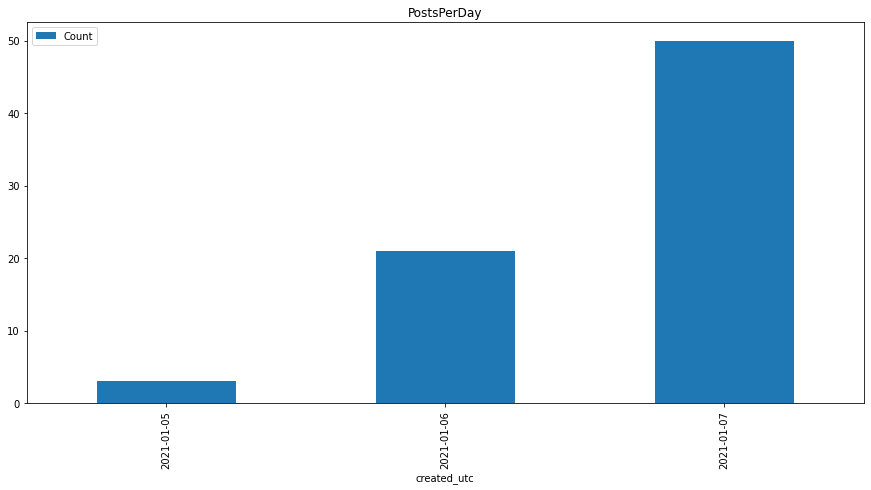

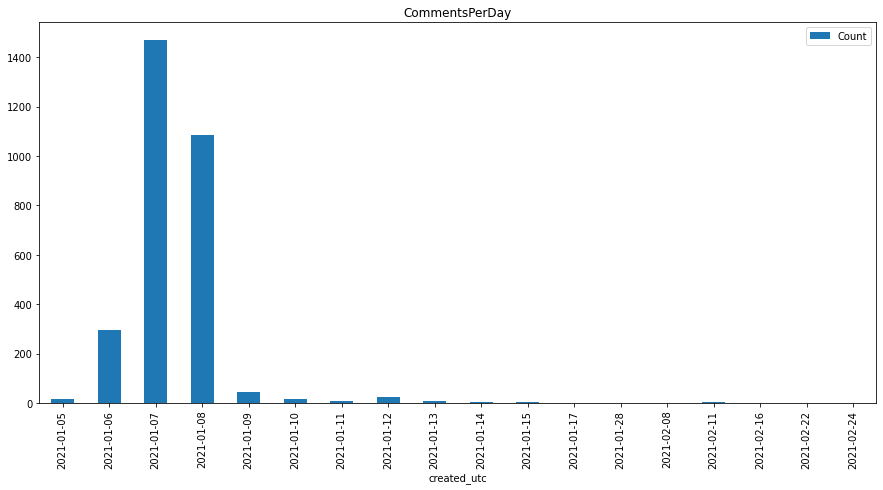

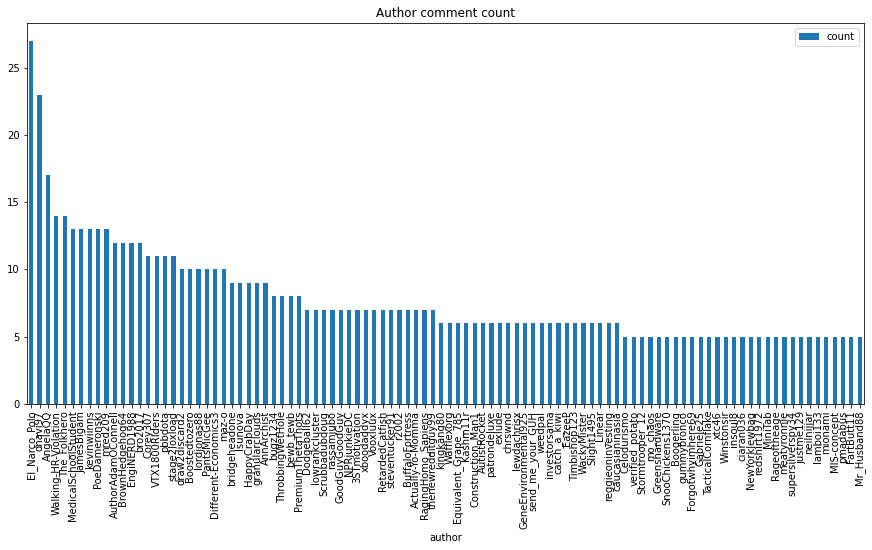

In [23]:
import scipy.stats as stats
###########################Some Statistics of the Data to help pruning#######################
#Using Cleaned comments therefore only comments that are not made by the same person as the post
commentStats = commentsOfPostsDF.copy()
#Convert unix time to datetime.
commentStats['created_utc'] = pandas.to_datetime(commentStats['created_utc'],unit='s')

#Using Cleaned Posts
postsStats = postsDataDF.copy()
postsStats['created_utc'] = pandas.to_datetime(postsStats['created_utc'],unit='s')


#####Posts per day over the 3 month period#####
numPostsDay = postsStats.groupby(postsStats['created_utc'].dt.date).size().reset_index(name='Count')
##################################################



#####Comments per day over the 3 month period#####
numCommsDay = commentStats.groupby(commentStats['created_utc'].dt.date).size().reset_index(name='Count')
##################################################



#####Bar Chart of number of comments per user#####
authorComments = commentStats['author'].value_counts()
#Convert back to dataframe
authorComments = authorComments.to_frame()
authorComments.reset_index(inplace=True)
authorComments.columns = ['author', 'count']
##################################################





#All Plots
numPostsDay.plot.bar(x='created_utc', figsize=(15,7), title='PostsPerDay')
numCommsDay.plot.bar(x='created_utc', figsize=(15,7), title='CommentsPerDay')
authorComments[:100].plot.bar(x='author', y='count',figsize=(15,7), title='Author comment count')

In [24]:
Pruning Details

Posts

Get all posts that have a score more than 1
Removed Moderator removed posts
Removed User removed posts


Comments
Removed all comments that have been removed - reddit spam filter, user or Moderator




The Join





SyntaxError: invalid syntax (<ipython-input-24-ec90b33776b4>, line 1)